# Shark Attack Project - Team 1

-------

## Introduction

The objective of this project is to analyze the data from the shark attack dataset and answer the following questions:

1. What are the most dangerous activities that lead to shark attacks?
2. What are the most dangerous species of sharks?
3. What are the most dangerous locations for shark attacks?             
4. What are the most dangerous months for shark attacks?

## Data

The dataset used in this project is the Global Shark Attack File, which contains information about shark attacks from 1900 to 2016. The dataset has 24 columns, which are:

1. Case Number
2. Date
3. Year
(...)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import os

In [3]:
url = "https://www.sharkattackfile.net/spreadsheets/GSAF5.xls"
original_df = pd.read_excel(url)

In [4]:
# create working copy of original dataframe
df = original_df.copy()

In [5]:
# get first impression of dataset
df.head(3)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,...,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,...,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,...,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(6969, 23)

In [7]:
# check column names
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Unnamed: 11', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [8]:
# remove whitespace behind column name for species
df = df.rename(columns = {"Species ": "Species"})

In [9]:
# choose certain variables that we are of interest for our problem statement
df = df[["Date", "Year", "Country", "Species"]]

In [10]:
# drop all rows where all columns are NaN
df = df.dropna(how='all')
df.shape

(6944, 4)

In [11]:
# drop all rows where 'Year' is NaN
df = df.dropna(subset = ['Year'])
df.head()

,Date,Year,Country,Species
0,15 Mar 2024,2024.0,AUSTRALIA,Tiger shark
1,04 Mar 2024,2024.0,USA,Tiger shark 8'
2,02 Mar-2024,2024.0,USA,3' to 4' shark
3,25 Feb-2024,2024.0,AUSTRALIA,Tiger shark
4,14 Feb-2024,2024.0,INDIA,"Bull shark, 7'"


In [12]:
# correct the way the Years are written (for example 2023.0 to 2023) [from string to integer]
df['Year'] = df['Year'].astype(int)
df.head(3)

,Date,Year,Country,Species
0,15 Mar 2024,2024,AUSTRALIA,Tiger shark
1,04 Mar 2024,2024,USA,Tiger shark 8'
2,02 Mar-2024,2024,USA,3' to 4' shark


In [13]:
# only consider last 10 years
df = df[(df['Year'] >= 2015)]

In [14]:
# check which countries have high incident number
df.Country.value_counts()[0:5]

Country
USA             508
AUSTRALIA       248
BAHAMAS          43
SOUTH AFRICA     43
BRAZIL           21
Name: count, dtype: int64

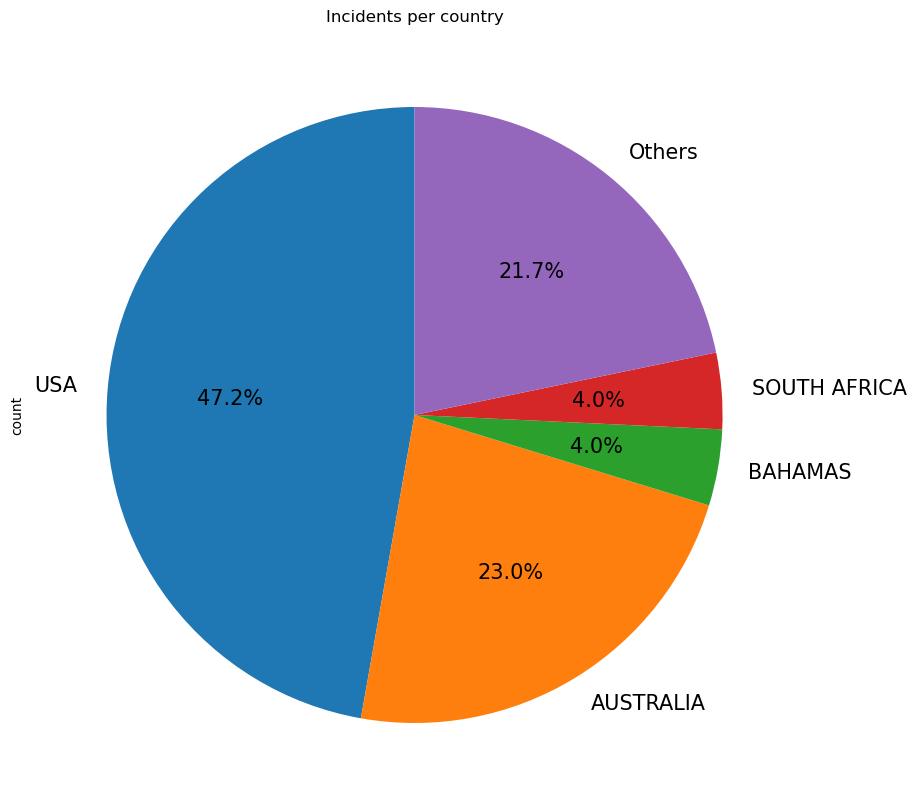

"\n\nThe lambda function lambda p: '{:.0f}'.format(p * total / 100) calculates the count by applying the percentage to the total sum and formats it as an integer. \nThis way, the pie chart will display the actual counts instead of percentages.\n\n"

In [15]:
#Make a piechart of the top 4 countries with the most incidents, and a fifth slice representing the rest

top_4 = df.Country.value_counts()[0:4]
others = df.Country.value_counts()[4:].sum()

#Make a piechart of the top 4 countries with the most incidents, and a fifth slice representing the rest

top_4 = df.Country.value_counts()[0:4]
others = df.Country.value_counts()[4:].sum()

top_4['Others'] = others

top_4.plot.pie(autopct='%1.1f%%', startangle=90, title='Incidents per country', figsize=(10,10),fontsize= 15)
plt.show()

#For future knowledge the autopct parameter is used to format the percentage of the pie chart.

"""

The lambda function lambda p: '{:.0f}'.format(p * total / 100) calculates the count by applying the percentage to the total sum and formats it as an integer. 
This way, the pie chart will display the actual counts instead of percentages.

"""


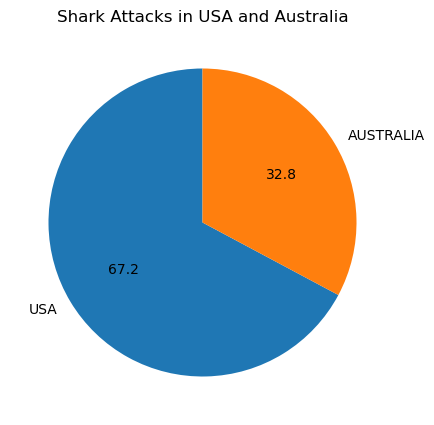

In [16]:
#Make a pie chart with the number of incidents in each country

australia_sum = df.loc[df["Country"] == "AUSTRALIA"].shape[0]
usa_sum = df.loc[df["Country"] == "USA"].shape[0]

#labels for the sections
labels = ['USA', 'AUSTRALIA']

#values for the sections
sizes = [usa_sum, australia_sum]

plt.figure(figsize=(10, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f', startangle=90)
plt.title('Shark Attacks in USA and Australia')
plt.show()

In [17]:
#Only consider incidents in USA

df_usa = df.loc[df['Country'] == 'USA'].copy()

In [19]:
#Formating the date column

# The first lambda function removes all whitespaces, commas, and hyphens from the date | Using regex -
df_usa['Date'] = df_usa['Date'].apply(lambda x: re.sub(r'[-\s,]', '', str(x)))

# The second lambda function adds a hyphen after the first four digits
df_usa['Date'] = df_usa['Date'].apply(lambda x: re.sub(r'(\d{4})', r'\1-', str(x)))

# The third lambda function converts the month into a numerical value
df_usa['Date'] = pd.to_datetime(df_usa['Date'], errors='coerce') 

# The fourth lambda function formats the date to 'dd-mm-yy' | Also here the date is converted to a string(object) in order to apply the strftime method.
df_usa['Date'] = df_usa['Date'].dt.strftime('%d-%m-%y')

# Convert the 'Date' column back to datetime format
df_usa['Date'] = pd.to_datetime(df_usa['Date'], format='%d-%m-%y', errors='coerce')

reset_index = df_usa.reset_index(drop=True)

df_usa.head(10)

/var/folders/dc/ldz3k5913l3gjmcgcw60g3x80000gp/T/ipykernel_89188/3703571258.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_usa['Date'] = pd.to_datetime(df_usa['Date'], errors='coerce')


,Date,Year,Country,Species
1,NaT,2024,USA,Tiger shark 8'
2,NaT,2024,USA,3' to 4' shark
10,NaT,2023,USA,NaN
24,NaT,2023,USA,NaN
29,NaT,2023,USA,8' tiger shark
33,NaT,2023,USA,10' tiger shark
34,NaT,2023,USA,NaN
35,NaT,2023,USA,10' to 12' Galapagos shark
37,NaT,2023,USA,NaN
38,NaT,2023,USA,NaN


In [39]:
df_usa.Date[0:3]

1    2024-03-04
2    2024-03-02
10   2023-12-30
Name: Date, dtype: datetime64[ns]

In [40]:
def get_season(Date):
    if pd.isna(Date):
        return 'Unknown'
    month = pd.to_datetime(Date).month #Convert Date to datetime object and extract the month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

df_usa['Season'] = df_usa['Date'].apply(get_season)

df_usa.head(3)


,Date,Year,Country,Species,Season
1,2024-03-04,2024,USA,Tiger shark 8',Spring
2,2024-03-02,2024,USA,3' to 4' shark,Spring
10,2023-12-30,2023,USA,NaN,Winter


In [41]:
df_usa["Date"].loc[df_usa.Season == "Unknown"]

72    NaT
384   NaT
456   NaT
597   NaT
Name: Date, dtype: datetime64[ns]

In [46]:
#Grouping by 'Season' and 'Year' and counting the occurrences

grouped_season = df_usa.groupby(['Season', 'Year']).size().unstack(fill_value=0)

#We had a last column where we summed all the occurrences of shark attacks in the USA

grouped_season['Total sum'] = grouped_season.sum(axis=1)

#The error= 'coerce' found 5 date formats that were not converted correctly, so they will show as "Unknown" in the 'Season' column, and will not be considered in the analysis.

grouped_season = grouped_season.drop('Unknown')

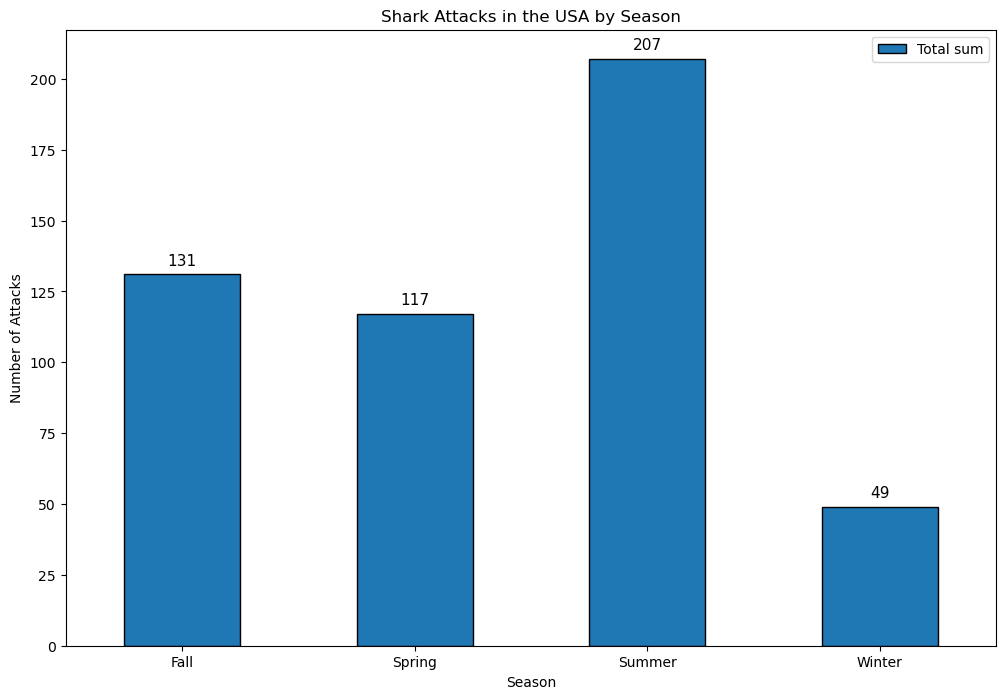

In [43]:
# Plotting the stacked bar chart using just the Season and total columns, and show the number on top of each bar

#Color blue ocean shades

blues_hades = ['#1f77b4', '#66b3ff', '#3399ff', '#1a75ff']

# Create the bar plot

ax = grouped_season[['Total sum']].plot(kind='bar', stacked=True, figsize=(12, 8), color=blues_hades, edgecolor='black')

# Add values for each season on top of each bar

"""
The for loop iterates over each bar in the plot.

f'{p.get_height()}': The height value is formatted as a string using an f-string.
p.get_x() + p.get_width() / 2.: The x-coordinate is calculated by adding the x-coordinate of the bar and half of its width.
p.get_height(): The y-coordinate is the height of the bar.
ha='center': The horizontal alignment is set to center.
va='center': The vertical alignment is set to center.
xytext=(0, 10): The text is placed 5 points above the bar.
textcoords='offset points': The text is offset by points.
fontsize=12: The font size is set to 12.

"""

for p in ax.patches: #Patches in matplotlib are the objects that we can see in the plot, like bars, lines, etc.
    ax.annotate(f'{int(p.get_height())}', 
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', 
            va='center', 
            xytext=(0, 10), 
            textcoords='offset points', 
            fontsize=11, 
            color='black')


# Set plot title and labels
plt.title('Shark Attacks in the USA by Season')
plt.ylabel('Number of Attacks')
plt.xlabel('Season')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()


In [44]:
# replace NaNs in Species by "Not Specified"
df_usa.Species.fillna("Not Specified", inplace=True)

#Standardize the species names
df_usa['Species'] = df_usa['Species'].apply(lambda x: "White Shark" if "white shark" in str(x).lower() else x)
df_usa['Species'] = df_usa['Species'].apply(lambda x: "Tiger Shark" if "tiger shark" in str(x).lower() else x)
df_usa['Species'] = df_usa['Species'].apply(lambda x: "Bull Shark" if "bull shark" in str(x).lower() else x)
df_usa['Species'] = df_usa['Species'].apply(lambda x: "Nurse Shark" if "nurse shark" in str(x).lower() else x)
df_usa['Species'] = df_usa['Species'].apply(lambda x: "Blacktip Shark" if "blacktip shark" in str(x).lower() else x)
df_usa['Species'] = df_usa['Species'].apply(lambda x: "Hammerhead Shark" if "hammerhead shark" in str(x).lower() else x)
df_usa['Species'] = df_usa['Species'].apply(lambda x: "Mako Shark" if "mako shark" in str(x).lower() else x)
df_usa['Species'] = df_usa['Species'].apply(lambda x: "Lemon Shark" if "lemon shark" in str(x).lower() else x)
df_usa['Species'] = df_usa['Species'].apply(lambda x: "Blue Shark" if "blue shark" in str(x).lower() else x)
df_usa['Species'] = df_usa['Species'].apply(lambda x: "Spinner Shark" if "spinner shark" in str(x).lower() else x)
df_usa['Species'] = df_usa['Species'].apply(lambda x: "Sand Tiger Shark" if "sand tiger shark" in str(x).lower() else x)
df_usa['Species'] = df_usa['Species'].apply(lambda x: "Dusky Shark" if "dusky shark" in str(x).lower() else x)
df_usa['Species'] = df_usa['Species'].apply(lambda x: "Caribbean Reef Shark" if "caribbean reef shark" in str(x).lower() else x)
df_usa['Species'] = df_usa['Species'].apply(lambda x: "Galapagos Shark" if "galapagos shark" in str(x).lower() else x)
df_usa['Species'] = df_usa['Species'].apply(lambda x: "Zambesi Shark" if "zambesi shark" in str(x).lower() else x)
df_usa['Species'] = df_usa['Species'].apply(lambda x: x if str(x) in df_usa.Species.value_counts().head(7).index else "Others")

Text(0.5, 1.0, 'Shark attacks in the US per species')

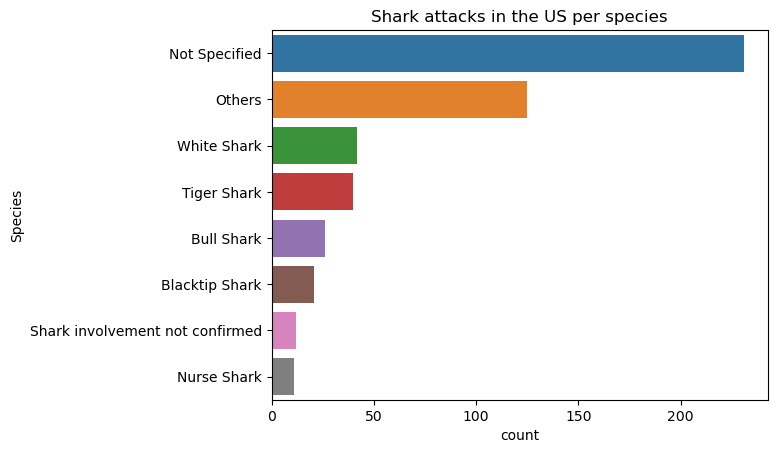

In [45]:
fig = sns.countplot(y = "Species", data = df_usa, order = df_usa["Species"].value_counts().index)
fig.set_title('Shark attacks in the US per species')